<a href="https://colab.research.google.com/github/Mara245/ML/blob/master/Copia_di_Empty_CNN_tutorial_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Tutorial on CNN
We try to build a DNN that recognize if an image contains a rectangle or a circle, count how many rectangle and circles are there or find where in the image the rectangle/circle is.

## Import useful stuff

In [20]:
from keras.layers import Dense, Input, Conv2D, MaxPooling2D, Flatten #FILL ME# Which layers will be needed in a CNN ?
from keras.models import Model
import numpy as np
from math import *
from matplotlib import pyplot as plt 

## Lets generate some data

We now generate ourself some images with a circle or a rectangle, of random color, in a random position.

Three different modes of generating the images are implemented:

*   A single shape per figure
*   Multiple shapes mixed in each figure
*   A single figure keeping track of the "bounding box"



### Additional Exercise
1. Try adding some random noise in the image background
2. Try adding more classes such e.g. Lines or Ellipses


In [21]:
import cv2

simple =True #single shape per figure
mixed  =False #multi shapes per figure
withBB =False  #one shape with bounding boxes


def background():
  return np.zeros((64,64,3), np.uint8) #EX# How would you change this to add some background noise?

def randomColor():
  return (int(np.random.rand()*128+128),int(np.random.rand()*128+128),int(np.random.rand()*128+128))

def drawCircle(c,x,y,r):
  img = background()
  cv2.circle(img,(x,y),r,c, -1)
  return img,x-r,y-r,x+r,y+r   #return image and bounding box

def genCircle():
  return drawCircle(randomColor(),int(np.random.rand()*50)+10,int(np.random.rand()*50)+10,
                    int(np.random.rand()*6)+3)

def drawRectangle(c,x,y,w,h):
  img = background()
  cv2.rectangle(img,(x,y),((x+w),(y+h)), c, -1)
  return img,x,y,x+w,y+h #return image and bounding box

def genRectangle():
  return drawRectangle(randomColor(),int(np.random.rand()*40)+10,int(np.random.rand()*40)+10,
                       int(np.random.rand()*12)+5,int(np.random.rand()*12)+5)

def genN(f,i): # generate multiple shapes
  img = np.zeros((64,64,3), np.uint8)
  for x in range(i):
    img+=f()[0] #discard bb info, take only image
  return img

nsamples=5000

#produce figures with either a rectangle or a circle
if simple :
  targets=np.array([np.random.rand()>0.5 for x in range(nsamples) ])
  images=np.array([genCircle()[0] if targets[x] else genRectangle()[0] for x in range(nsamples)])

#produce figure with n rectangles and m circles
if mixed:
  targets=np.array([(int(np.random.rand()*4),int(np.random.rand()*4)) for x in range(nsamples) ])
  images=np.array([genN(genRectangle,targets[x,0])+genN(genCircle,targets[x,1]) for x in range(nsamples)])

if withBB : 
#produce figures with either a rectangle or a circle
  targets=np.array([np.random.rand()>0.5 for x in range(nsamples) ])
  imagesWithBB=[genCircle() if targets[x] else genRectangle() for x in range(nsamples)]
  images=np.array([imagesWithBB[x][0] for x in range(nsamples)])
  boundingBoxes=np.array([imagesWithBB[x][1:] for x in range(nsamples)])


Let's show a few of the generated images

(5000,)
(5000, 64, 64, 3)
[False  True False  True  True  True False  True  True False]


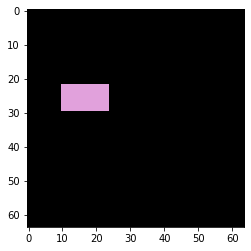

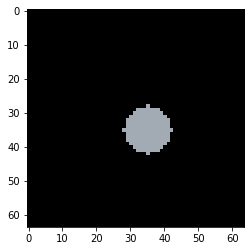

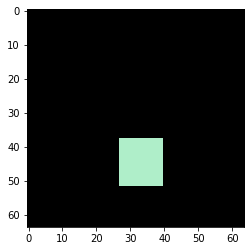

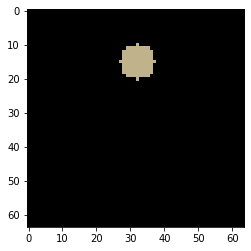

In [22]:
print(targets.shape)
print(images.shape)           #FILL ME# print the shape of the images and target data
print(targets[:10])           #FILL ME# print the the first N entries of the target data

#show the first 4 images#
for i in range(4):
  plt.imshow(images[i])
  plt.show()

#
#if withBB:
#  FILL ME#  print bounding box shapes and first N entries
  


## Additional Exercise
3. If we have more categories (let say N) we should use a categorical label that is a vector of length N with 1 on the category(/ies) the image belong to and 0 in the others. Try to build a categorical label for two categories 

4. Expand the categorical label to  Ellispes or  Lines  and possibly also non exclusive categories such has 2D vs 1D objects

In [23]:
#QUESTION# What are the tensors now corresponding to "X" and "y" (with previous lecture notation) ?
if withBB :
    labels=[targets,boundingBoxes] 
else:
    labels=targets



# Let's build a CNN 

Now we build our first CNN. We have some Conv layers interleaved with MaxPooling, and finally we flatten the output of the convolutional stack and appply a Dense FF:
![alt text](https://missinglink.ai/wp-content/uploads/2019/08/LeNet-5-1998.png)


### MaxPooling
![alt text](https://computersciencewiki.org/images/8/8a/MaxpoolSample2.png)

### Additional Exercise
5. Try adding/removing convolutional layers, change the kernel size, try to add dropout
6. Try changing the model to categorical labels, change loss function from binary_crossentropy to categorical_crossentropy, and use softmax activation instead of sigmoid


In [24]:
inputs=Input(shape=(64,64,3))                       #FILL ME# What is the input shape?
conv = Conv2D(5, (3,3), activation='relu')(inputs)          # try building a CNN with three 2D Conv layers with a number of filters between 3 and 10
pool = MaxPooling2D((2,2))(conv)                    # interleave them with with Max  pooling layers
conv = Conv2D(5, (5,5), activation='relu')(pool)
pool = MaxPooling2D((3,3))(conv)
flatten = Flatten()(pool)                           # then use the "Flatten" layer to forget the multidimensional shape
                                                    # add a final Feed Forward DNN

dense = Dense(32, activation='relu')(flatten)

#FILL ME# now let's try to decide the output layer, the activation and the loss based on the problem we have 
if simple : 
  outputs = Dense(1, activation='sigmoid')(dense)                     #FILLME# what is the output shape in this case? which activation?
  loss="binary_crossentropy"  # [0,1] classification hence loss should be => .... ?
"""
if mixed : 
  outputs = #FILL ME#  Here we want to predict how many rect? and how many Circ?
  loss='' #FILLME#
if withBB : #In this case we have two separate output layers, two target tensors, two losses
  output1 = Dense(1, activation='')(hidden) #FILLME# which activation for the circle vs rectangle classification? 
  output2 = Dense(4, activation='')(hidden) #FILLME# which activation to predict the 4 numbers of the bounding box ?
  outputs=[output1,output2]
  loss=["",""] #FILL ME # And which loss for each of the two outputs? (the final loss will be the sum unless we give them some additional weights)
  """
model = Model(inputs=inputs, outputs=outputs)
model.compile(loss=loss, optimizer='adam',metrics=['accuracy'])

model.summary()

#if withBB:
#FILL ME#  try to print the graph of the network in this case


Model: "functional_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_9 (InputLayer)         [(None, 64, 64, 3)]       0         
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 62, 62, 5)         140       
_________________________________________________________________
max_pooling2d_10 (MaxPooling (None, 31, 31, 5)         0         
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 27, 27, 5)         630       
_________________________________________________________________
max_pooling2d_11 (MaxPooling (None, 9, 9, 5)           0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 405)               0         
_________________________________________________________________
dense_4 (Dense)              (None, 32)               

And now let's fit it to our data.
The sample is automatically split in two so that 50% of it is used for validation and the other half for training


In [25]:
history=model.fit(images, labels, validation_split=0.5, epochs=20) #FILL ME# Who are "X" and "y" here?

Epoch 1/20
79/79 [==============================] - 1s 12ms/step - loss: 3.9169 - accuracy: 0.5728 - val_loss: 1.5265 - val_accuracy: 0.6240
Epoch 2/20
79/79 [==============================] - 1s 9ms/step - loss: 0.9500 - accuracy: 0.6844 - val_loss: 0.8047 - val_accuracy: 0.6952
Epoch 3/20
79/79 [==============================] - 1s 9ms/step - loss: 0.4000 - accuracy: 0.8304 - val_loss: 0.3073 - val_accuracy: 0.8808
Epoch 4/20
79/79 [==============================] - 1s 9ms/step - loss: 0.1066 - accuracy: 0.9604 - val_loss: 0.0947 - val_accuracy: 0.9680
Epoch 5/20
79/79 [==============================] - 1s 9ms/step - loss: 0.0240 - accuracy: 0.9932 - val_loss: 0.0455 - val_accuracy: 0.9860
Epoch 6/20
79/79 [==============================] - 1s 9ms/step - loss: 0.0080 - accuracy: 1.0000 - val_loss: 0.0321 - val_accuracy: 0.9920
Epoch 7/20
79/79 [==============================] - 1s 9ms/step - loss: 0.0043 - accuracy: 1.0000 - val_loss: 0.0250 - val_accuracy: 0.9924
Epoch 8/20
79/79 [=

*history* contains information about the training.  We can now now show the loss vs epoch for both validation and training samples.




dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


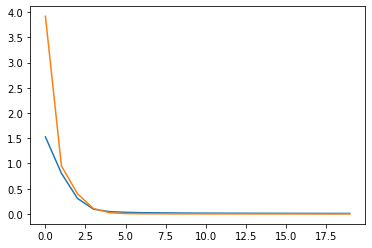

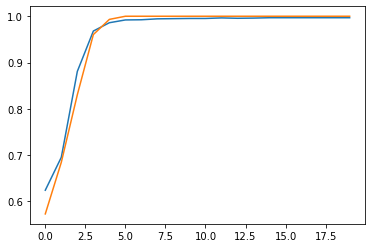

In [27]:
print(history.history.keys())
plt.plot(history.history["val_loss"])
plt.plot(history.history["loss"])
plt.show()
plt.plot(history.history["val_accuracy"])
plt.plot(history.history["accuracy"])
plt.show()


Let's try to create a new image and evaluate it

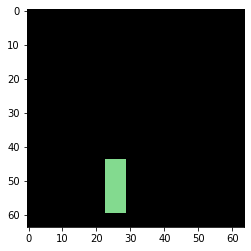

[[0.00070815]]


'\nif mixed :\n  im= genCircle()[0]+genRectangle()[0]+genRectangle()[0]\n  #FILL ME#try predicting on the "im" generated above... how do we access the number of predicted objects?\n  #print("In this image there are %s rectangle and %s circles"%(....,....))\n  plt.imshow(im)\n  plt.show()\n\nif withBB:\n  im,x1,y1,x2,y2= genCircle()\n  pre=model.predict(np.expand_dims(im,axis=0) )\n  isCircle=pre[0][0]\n  x1p=pre[1][0][0]-1.\n  y1p=pre[1][0][1]-1.\n  x2p=pre[1][0][2]+1.\n  y2p=pre[1][0][3]+1.\n  print(x1p,y1p,x2p,y2p)\n  #print("Looks like a", ("circle" if model.predict(np.expand_dims(im,axis=0) )[0,1] > 0.5 else "rectangle"))\n  print("It is a","circle" if isCircle > 0.5 else "rectangle" )\n  cv2.rectangle(im,(x1-1,y1-1),(x2+1,y2+1), (255,0,0), 1)\n  cv2.rectangle(im,(int(x1p),int(y1p)),(int(x2p),int(y2p)), (255,255,0), 1)\n  plt.imshow(im)\n  plt.show()\n'

In [30]:
image = genRectangle()[0]                #FILL ME# try to generate a new circle and check if the network recognizes it
plt.imshow(image)
plt.show()
sample = np.reshape(image, (1,64,64,3))
prediction = model.predict(sample)
print(prediction)

"""
if mixed :
  im= genCircle()[0]+genRectangle()[0]+genRectangle()[0]
  #FILL ME#try predicting on the "im" generated above... how do we access the number of predicted objects?
  #print("In this image there are %s rectangle and %s circles"%(....,....))
  plt.imshow(im)
  plt.show()

if withBB:
  im,x1,y1,x2,y2= genCircle()
  pre=model.predict(np.expand_dims(im,axis=0) )
  isCircle=pre[0][0]
  x1p=pre[1][0][0]-1.
  y1p=pre[1][0][1]-1.
  x2p=pre[1][0][2]+1.
  y2p=pre[1][0][3]+1.
  print(x1p,y1p,x2p,y2p)
  #print("Looks like a", ("circle" if model.predict(np.expand_dims(im,axis=0) )[0,1] > 0.5 else "rectangle"))
  print("It is a","circle" if isCircle > 0.5 else "rectangle" )
  cv2.rectangle(im,(x1-1,y1-1),(x2+1,y2+1), (255,0,0), 1)
  cv2.rectangle(im,(int(x1p),int(y1p)),(int(x2p),int(y2p)), (255,255,0), 1)
  plt.imshow(im)
  plt.show()
"""